## PCB Hole Qualification

Description:

Quality control is of vital importance during electronics production. As the methods of producing electronic circuits improve, there is an increasing chance of solder defects during assembling the printed circuit board (PCB). Technology like X-ray imaging is used for inspection. 

AI-based models are proposed in the state-of-the art. 

We use one of the latest segmentation models to solve this problem
of void detection. 

**SAM (Segment Anything Model)**
It is agnostic model that can segment every single region in the
image as a new class, using a point or surrounding the target zones.

# Project steps
### Part 1 - Completed on Roboflow
■ Annotation

■ Augmentation

### **Part 2 - This Notebook**
■ Yolo training on two classes: 
  - voids 
  - component (darker background)

■ Yolo validation

### Part 3
■ Using a pre-trained SAM to segment voids and background, using the output of yolo:

  - Input: image and corresponding bounding boxes given by yolo as output

  - Output: segmented areas with two different masks

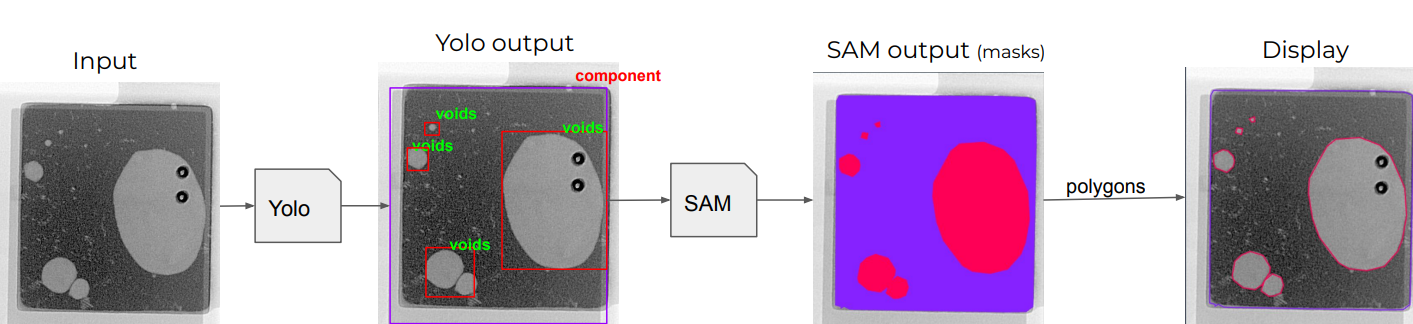

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon May 22 04:11:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
import os
import torch

HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [3]:
!pip install ultralytics==8.0.20 --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 🐍 Download and use a Pre-Trained Model


In [5]:
import requests
yolo8n_url = "https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt"

try:
    response = requests.get(yolo8n_url)
    response.raise_for_status()
    
    with open("yolov8n.pt", "wb") as file:
        file.write(response.content)
        
    print("Yolov8 model downloaded successfully!")
except requests.exceptions.RequestException as e:
    print(f"An error occurred while downloading the file: {e}")

Yolov8 model downloaded successfully!


In [6]:
model = YOLO('yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', 
                        conf=0.25, save=True)


Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100%|██████████| 104k/104k [00:00<00:00, 5.19MB/s]
Results saved to runs/detect/predict


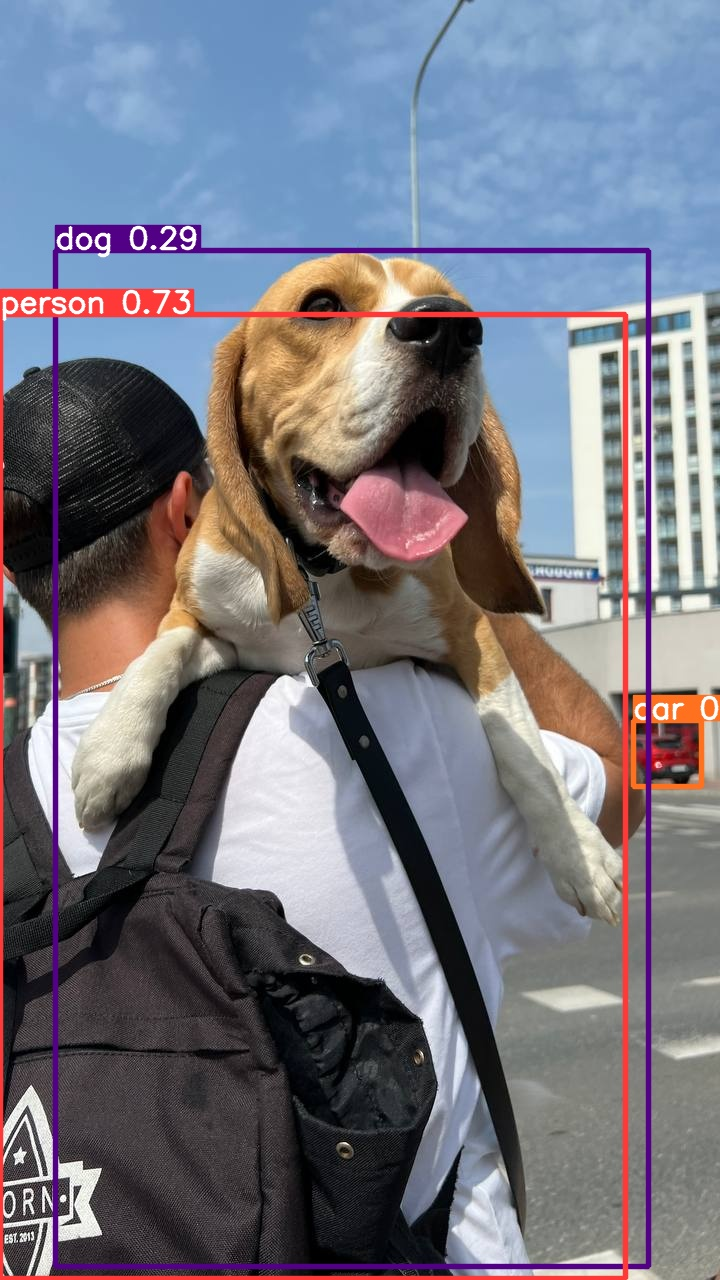

In [7]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

## Annotate Data From Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




## Download the Dataset

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Hp5hidJ2MxhXMd3IYOmb")
project = rf.workspace("samdeploymentmodel").project("pcb_quality_control")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PCB_Quality_Control-1 in yolov8:: 100%|██████████| 94/94 [00:00<00:00, 2113.28it/s]


## Custom Training

In [9]:
%cd {HOME}

device = 0 if torch.cuda.is_available() else "cpu"
project="quality_control"
name="aiv"

print(f'Using device: {device}')

model = YOLO(f'{HOME}/yolov8s.pt')
model.train(data=f'{dataset.location}/data.yaml', 
            epochs=25, task="detect",
            imgsz=800, plots=True, device=device, 
            project=project, name=name
            )

/content
Using device: 0


100%|██████████| 21.5M/21.5M [00:00<00:00, 161MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/PCB_Quality_Control-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=0, workers=8, project=quality_control, name=aiv, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

In [12]:
# !ls {HOME}/{project}/{name}

/content


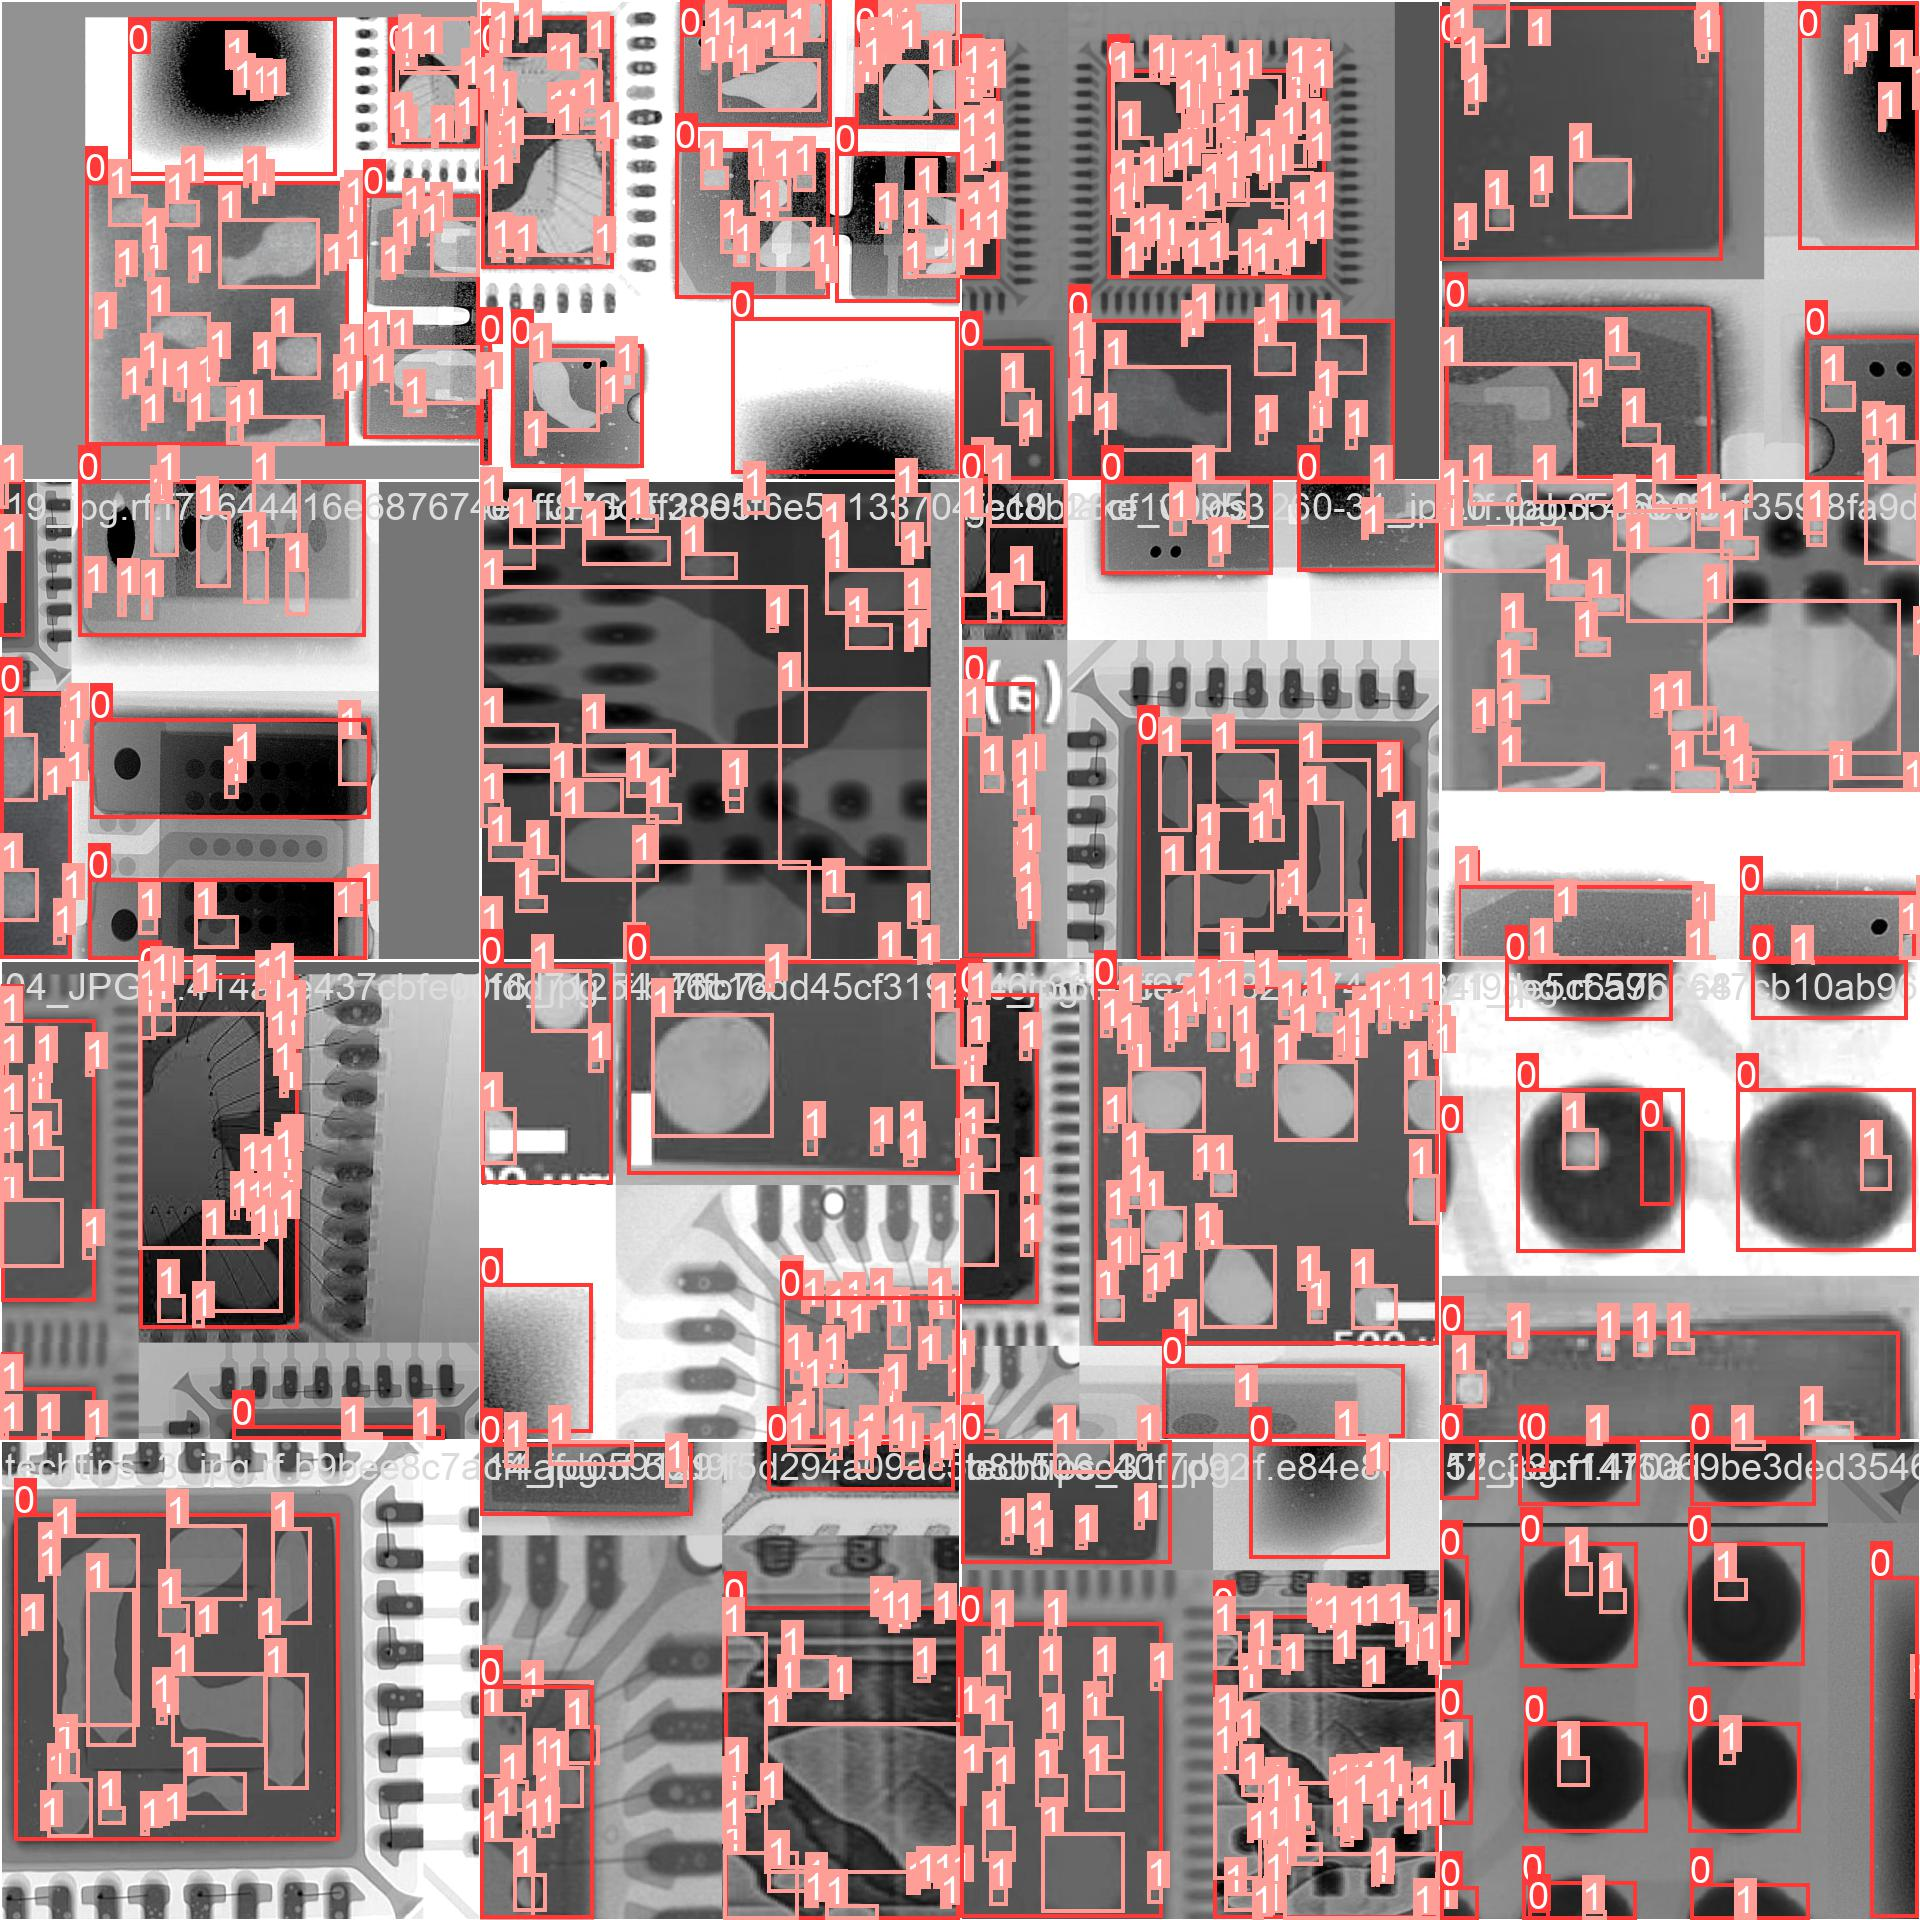

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/{project}/{name}/train_batch0.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

## load the model
model = YOLO(f'{HOME}/{project}/{name}/weights/best.pt')
model.val(data=f'{dataset.location}/data.yaml',
          project="quality_control", name="aiv")

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


/content


Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/PCB_Quality_Control-1/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/PCB_Quality_Control-1/valid/images/03_JPG.rf.ca869cdd7e9fc8f0a4f2de6a60ec8833.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
                   all          7        304      0.339      0.436      0.367      0.213
             component          7         16      0.188       0.25      0.131     0.0714
                  void          7        288       0.49      0.622      0.603      0.355
Speed: 0.4ms pre-process, 20.7ms inference, 0.0ms loss, 4.4ms post-process per image


/content


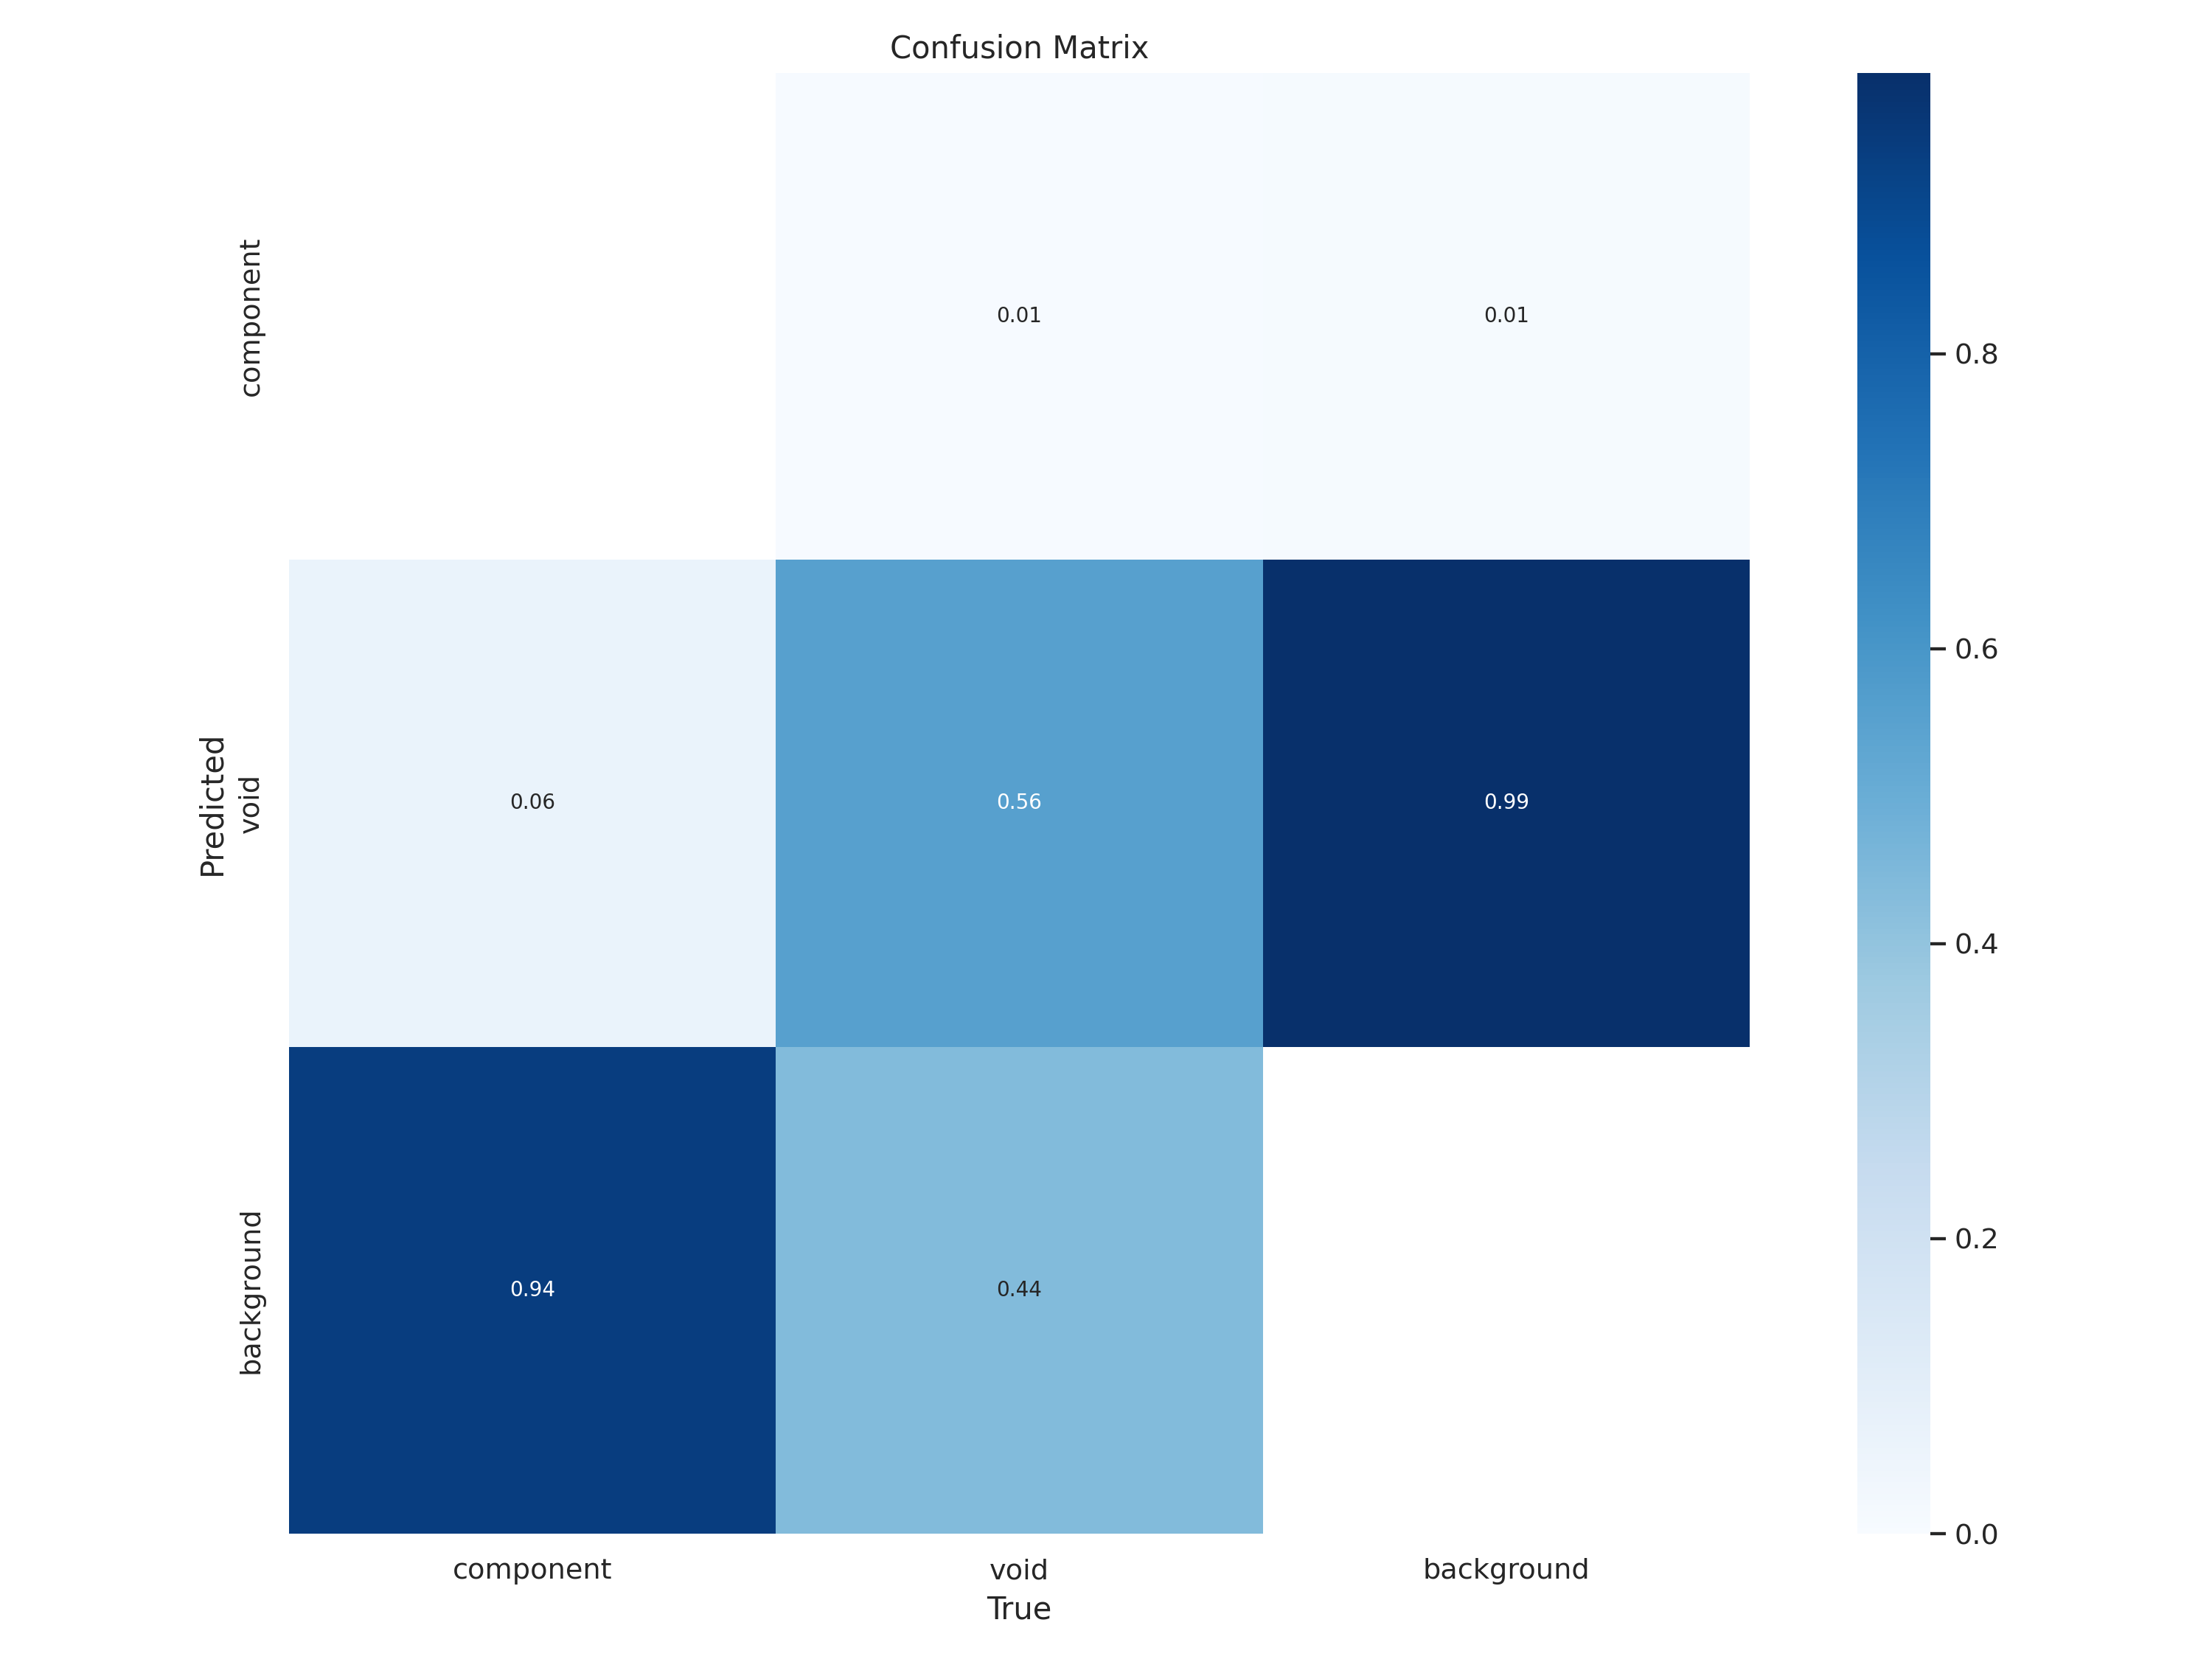

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/{project}/{name}/confusion_matrix.png', width=450)

## Zip the model for consistent in later usage

In [13]:
import zipfile

%cd {HOME}

model_path = f'{HOME}/{project}/{name}/weights/best.pt'
zip_filename = 'yolo_best_model.zip'

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(model_path, arcname='yolov8_pcb_best.pt')

print(f'{model_path} has been zipped as {zip_filename}')


/content
/content/quality_control/aiv/weights/best.pt has been zipped as yolo_best_model.zip


## Inference with Custom Model

Inference on unseen images

In [ ]:
from ultralytics import YOLO

## Load model
model = YOLO(f'{HOME}/{project}/{name}/weights/best.pt')

results = model.predict(source=f"{dataset.location}/test/images/", 
                        show=True, save=True,
                        conf=0.25 ) # Display preds. Accepts all YOLO predict arguments

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


In [ ]:
%cd {HOME}
project="quality_control"
name="aiv"
# !yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

!yolo task=detect mode=predict model=quality_control/aiv/weights/best.pt conf=0.25 source=datasets/PCB_Quality_Control-1/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=450))
      print("\n")